# LINEAR REGRESSION ASSIGNMENT

## Bike Share Assignment

## Importing all the necessary libraries.

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

## Loading Data set

In [170]:
# Loading the data set
bike_sharing_df = pd.read_csv('day.csv')
bike_sharing_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [171]:
# Checking for any null values in the data frame
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


It is observed that in the data set there are no NULL values

In [172]:
bike_sharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [182]:
bike_sharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [183]:
req_columns = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']

## Visualizing Data

<Figure size 1440x720 with 0 Axes>

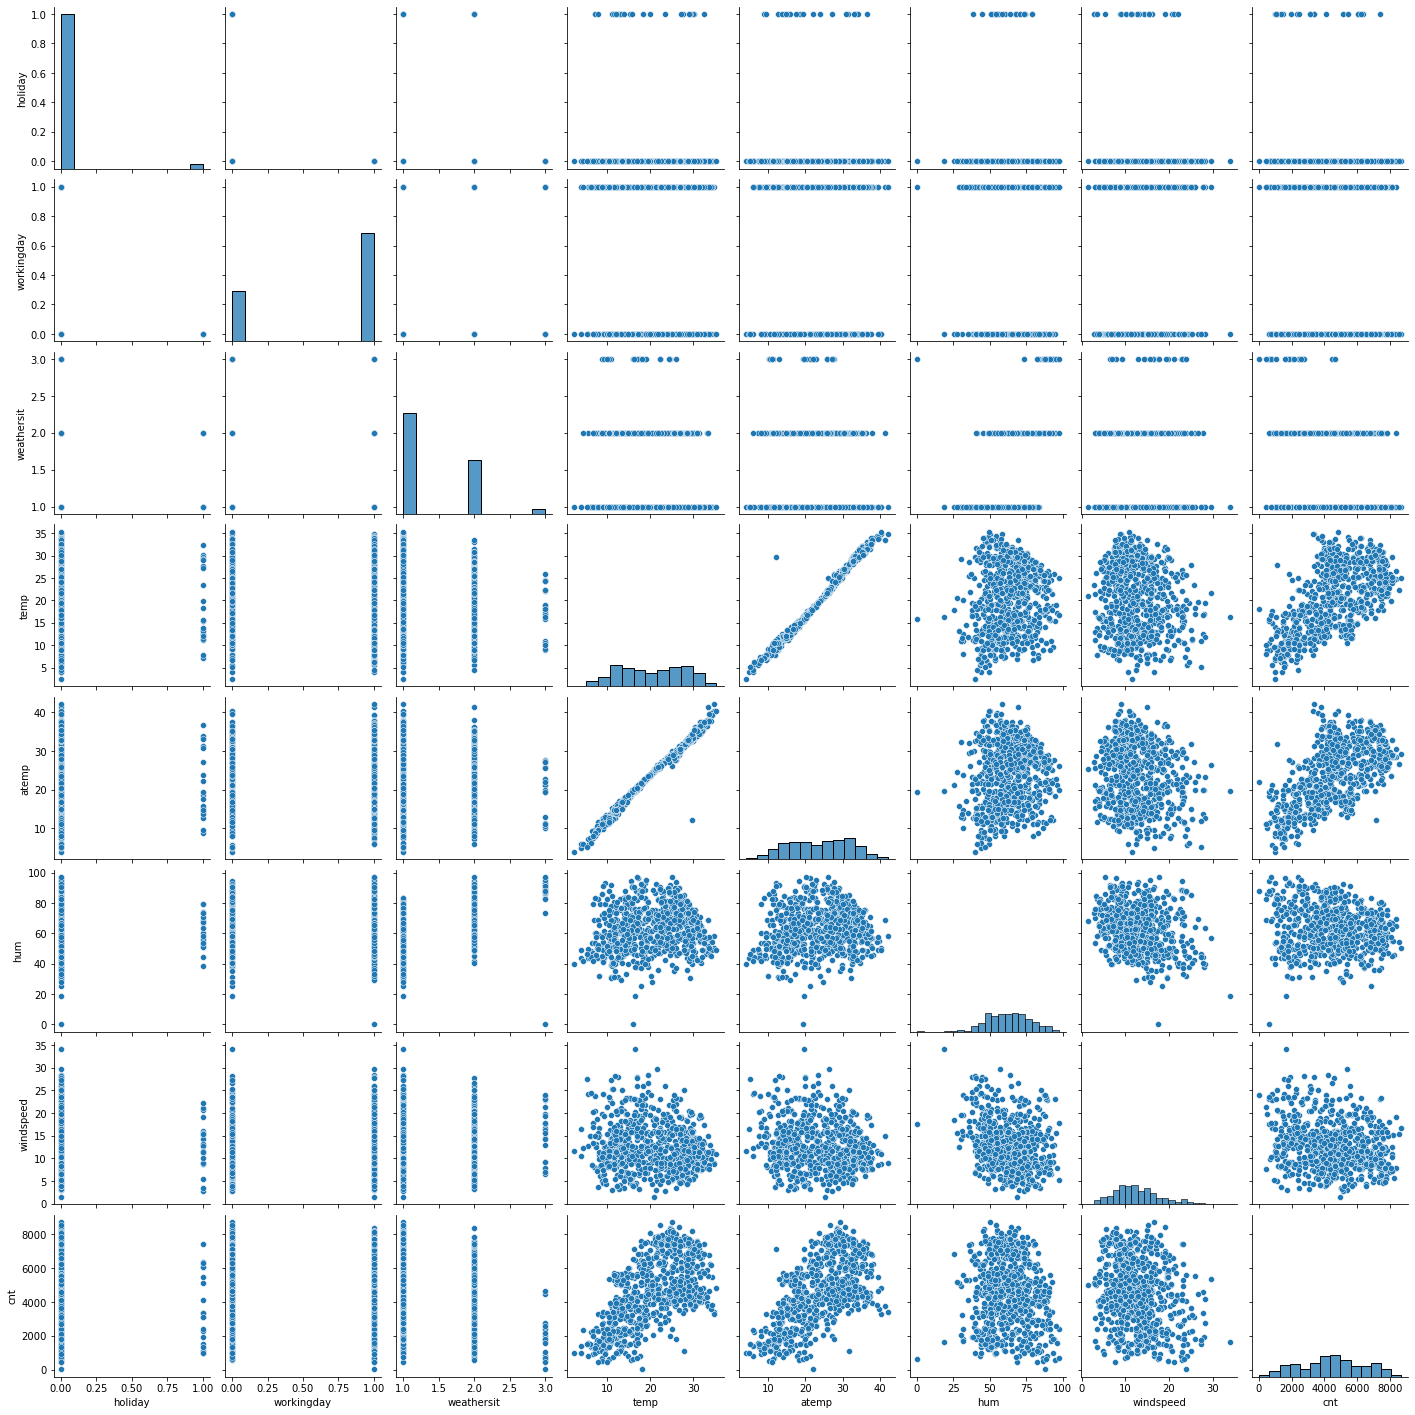

In [184]:
# Visualizing the data for the necessary columns
plt.figure(figsize = (20,10))
sns.pairplot(bike_sharing_df[req_columns])
plt.show()

In [177]:
#Assigning the Season column with value in order to segregate 
bike_sharing_df.loc[(bike_sharing_df['season'] == 4) , 'season'] = 'winter'
bike_sharing_df.loc[(bike_sharing_df['season'] == 2) , 'season'] = 'summer'
bike_sharing_df.loc[(bike_sharing_df['season'] == 1) , 'season'] = 'spring'
bike_sharing_df.loc[(bike_sharing_df['season'] == 3) , 'season'] = 'fall'
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [178]:
bike_sharing_df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [179]:
#Assigning values to month
bike_sharing_df[['mnth']] = bike_sharing_df[['mnth']].apply(lambda x : x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'}))
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [180]:
bike_sharing_df['mnth'].value_counts()

Jan     62
Mar     62
May     62
Jul     62
Aug     62
Oct     62
Dec     62
Apr     60
Jun     60
Sept    60
Nov     60
Feb     56
Name: mnth, dtype: int64

In [181]:
#Assigning values to days
bike_sharing_df[['weekday']] = bike_sharing_df[['weekday']].apply(lambda x : x.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'}))
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tues,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thurs,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [185]:
bike_sharing_df['weekday'].value_counts()

Mon      105
Tues     105
Wed      105
Thurs    104
Sat      104
Sun      104
Fri      103
Name: weekday, dtype: int64

In [187]:
#Assign values to weathersit:
bike_sharing_df.loc[(bike_sharing_df['weathersit'] == 1) , 'weathersit'] = 'Clear'
bike_sharing_df.loc[(bike_sharing_df['weathersit'] == 2) , 'weathersit'] = 'Mist'
bike_sharing_df.loc[(bike_sharing_df['weathersit'] == 3) , 'weathersit'] = 'Light_Rain'
bike_sharing_df.loc[(bike_sharing_df['weathersit'] == 4) , 'weathersit'] = 'Heavy_rain'
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tues,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [188]:
bike_sharing_df['weathersit'].value_counts()

Clear         463
Mist          246
Light_Rain     21
Name: weathersit, dtype: int64

### Finding the relationship between the total count and individual variables

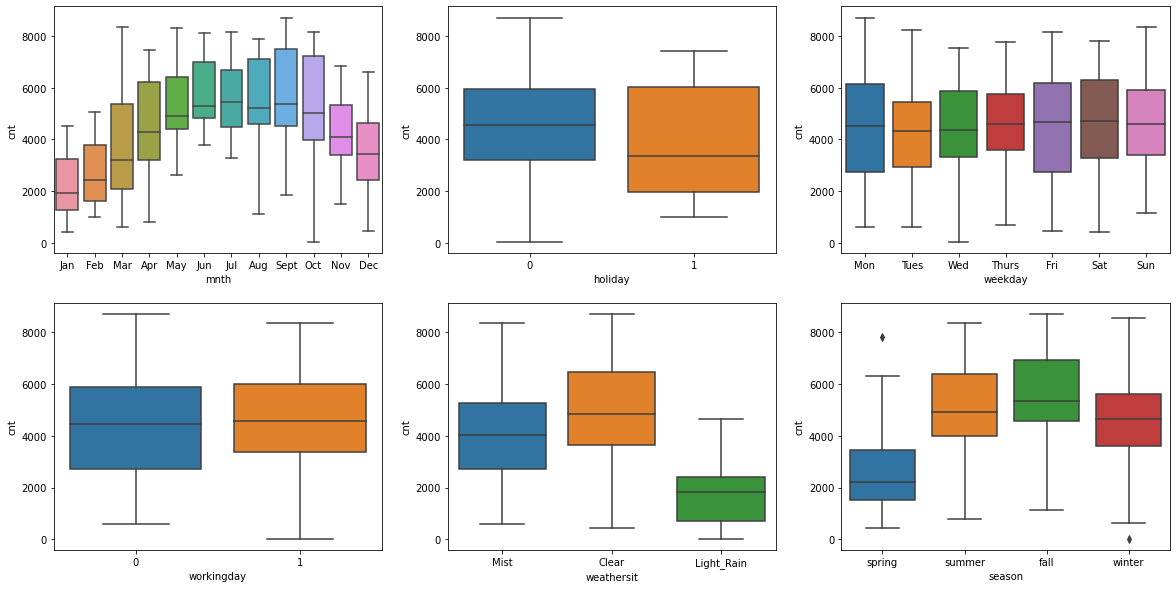

In [189]:
plt.figure(figsize = (20,10))
plt.subplot(2,3,1)
sns.boxplot(x='mnth', y='cnt', data = bike_sharing_df)

plt.subplot(2,3,2)
sns.boxplot(x='holiday', y='cnt', data = bike_sharing_df)

plt.subplot(2,3,3)
sns.boxplot(x='weekday', y='cnt', data = bike_sharing_df)

plt.subplot(2,3,4)
sns.boxplot(x='workingday', y='cnt', data = bike_sharing_df)

plt.subplot(2,3,5)
sns.boxplot(x='weathersit', y='cnt', data = bike_sharing_df)

plt.subplot(2,3,6)
sns.boxplot(x='season', y='cnt', data = bike_sharing_df)
plt.show()

### Visualizing the count with respect to year

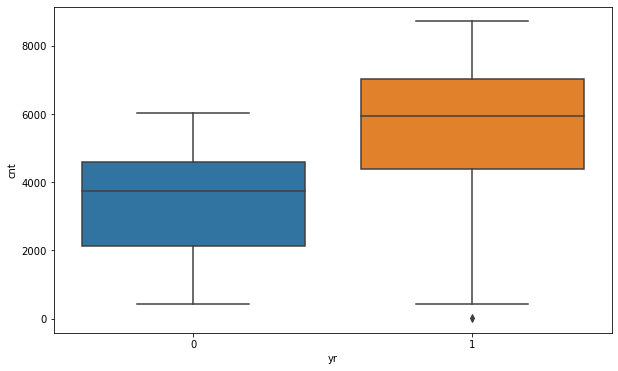

In [191]:
plt.figure(figsize = (10,6))
sns.boxplot(x='yr', y='cnt', data = bike_sharing_df)
plt.show()

<AxesSubplot:>

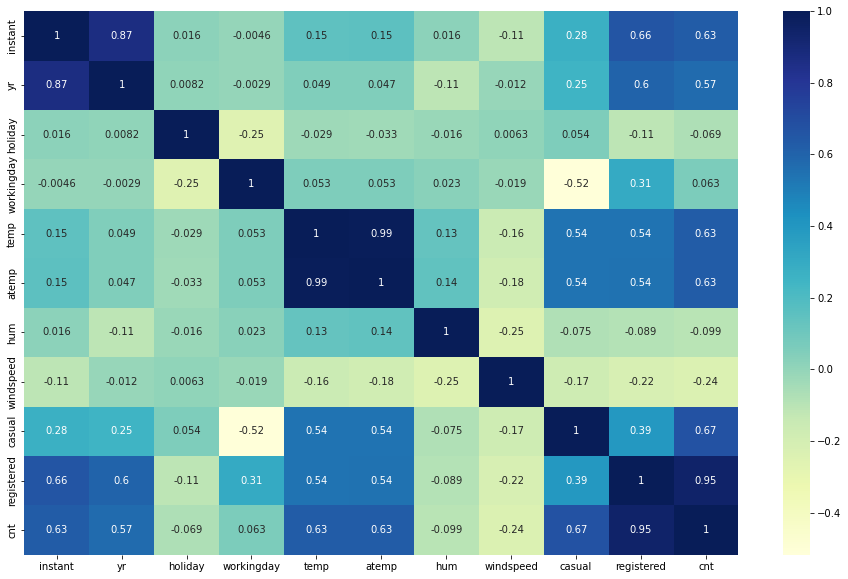

In [194]:
plt.figure(figsize = (16,10))
sns.heatmap(bike_sharing_df.corr(),annot=True,cmap='YlGnBu')

## Preparing data

Introducing dummy variables

In [195]:
#Creating a dataframe with categorical values
varlist = ['season','mnth','weekday','weathersit']
bike_sharing_df[varlist].head()

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,Mist
1,spring,Jan,Tues,Mist
2,spring,Jan,Wed,Clear
3,spring,Jan,Thurs,Clear
4,spring,Jan,Fri,Clear


In [196]:
#Creating dummy variables
dummy_variables = pd.get_dummies(bike_sharing_df[varlist],drop_first =True)
dummy_variables

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Rain,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
726,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
727,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [197]:
bike_sharing_df = pd.concat([bike_sharing_df , dummy_variables], axis=1)
bike_sharing_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Rain,weathersit_Mist
0,1,01-01-2018,spring,0,Jan,0,Mon,0,Mist,14.110847,...,0,0,1,0,0,0,0,0,0,1
1,2,02-01-2018,spring,0,Jan,0,Tues,0,Mist,14.902598,...,0,0,0,0,0,0,1,0,0,1
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,...,0,0,0,0,0,0,0,1,0,0
3,4,04-01-2018,spring,0,Jan,0,Thurs,1,Clear,8.200000,...,0,0,0,0,0,1,0,0,0,0
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,spring,1,Dec,0,Sat,1,Mist,10.420847,...,0,0,0,1,0,0,0,0,0,1
726,727,28-12-2019,spring,1,Dec,0,Sun,1,Mist,10.386653,...,0,0,0,0,1,0,0,0,0,1
727,728,29-12-2019,spring,1,Dec,0,Mon,0,Mist,10.386653,...,0,0,1,0,0,0,0,0,0,1
728,729,30-12-2019,spring,1,Dec,0,Tues,0,Clear,10.489153,...,0,0,0,0,0,0,1,0,0,0


## Splitting data set into train and test set

In [198]:
df_train , df_test = train_test_split(bike_sharing_df , train_size = 0.7 , random_state = 100)
df_train.shape

(510, 38)

In [199]:
df_train.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Rain,weathersit_Mist
576,577,31-07-2019,fall,1,Jul,0,Thurs,1,Clear,29.246653,...,0,0,0,0,0,1,0,0,0,0
426,427,03-03-2019,spring,1,Mar,0,Mon,0,Mist,16.980847,...,0,0,1,0,0,0,0,0,0,1
728,729,30-12-2019,spring,1,Dec,0,Tues,0,Clear,10.489153,...,0,0,0,0,0,0,1,0,0,0
482,483,28-04-2019,summer,1,Apr,0,Mon,0,Mist,15.443347,...,0,0,1,0,0,0,0,0,0,1
111,112,22-04-2018,summer,0,Apr,0,Sun,1,Mist,13.803347,...,0,0,0,0,1,0,0,0,0,1


In [200]:
# Dropping the Categorical columns and not required columns
df_train = df_train.drop(['temp','casual','registered','dteday','instant','season','mnth','weekday','weathersit'] , axis=1)
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Rain,weathersit_Mist
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,0,1,0,0,0,0,0,0,1
111,0,0,1,16.0977,72.9583,14.707907,1683,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [201]:
scaler = MinMaxScaler()
num_vars = ['atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Rain,weathersit_Mist
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,0,1
111,0,0,1,0.318819,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,0,1


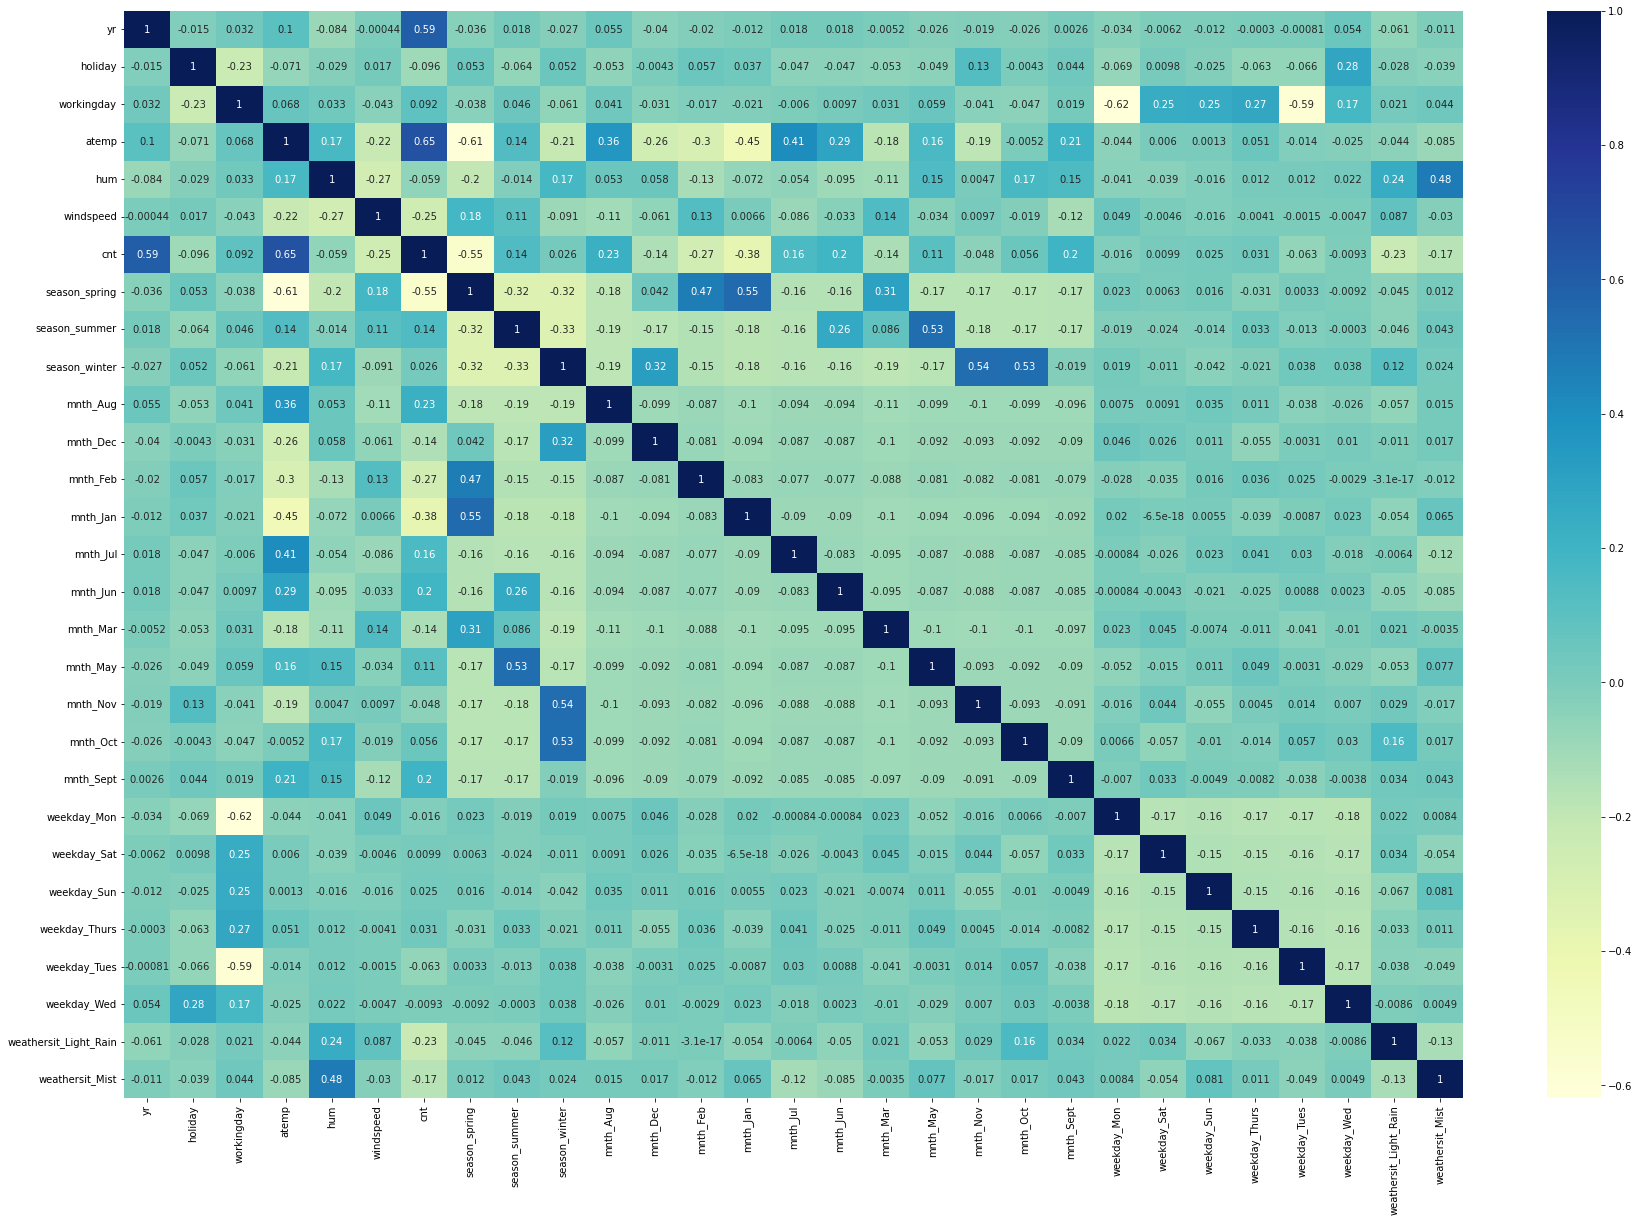

In [205]:
plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

Creating X train and y train set

In [206]:
y_train = df_train.pop('cnt')
X_train = df_train

In [207]:
y_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

In [209]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Rain,weathersit_Mist
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
111,0,0,1,0.318819,0.751824,0.380981,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


### Building the linear regression model with the above features

In [210]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()

In [211]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.4
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.07e-179
Time:                        18:42:05   Log-Likelihood:                 523.21
No. Observations:                 510   AIC:                            -990.4
Df Residuals:                     482   BIC:                            -871.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2561      0.035      7.249      0.000       0.187       0.326
yr                        0.2344      0.008     28.934      0.000       0.218       0.250
holiday                   0.0163      0.024      0.671      0.503      -0.031       0.064
workingday                0.0955      0.012      7.886      0.000       0.072       0.119
atemp                     0.4160      0.045      9.174      0.000       0.327       0.505
hum                      -0.1459      0.039     -3.761      0.000      -0.222      -0.070
windspeed                -0.1683      0.026     -6.488      0.000      -0.219      -0.117
season_spring            -0.0519      0.030     -1.724      0.085      -0.111       0.007
season_summer             0.0348      0.026      1.327      0.185      -0.017       0.086
season_winter             0.1015      0.028      3.612      0.000       0.046       0.157
mnth_Aug                  0.0419      0.033      1.257      0.209      -0.024       0.107
mnth_Dec                 -0.0526      0.034     -1.560      0.120      -0.119       0.014
mnth_Feb                 -0.0404      0.033     -1.221      0.223      -0.105       0.025
mnth_Jan                 -0.0736      0.034     -2.188      0.029      -0.140      -0.007
mnth_Jul                 -0.0147      0.035     -0.424      0.672      -0.083       0.053
mnth_Jun                  0.0242      0.024      1.000      0.318      -0.023       0.072
mnth_Mar                 -0.0003      0.025     -0.014      0.989      -0.049       0.048
mnth_May                  0.0363      0.021      1.734      0.084      -0.005       0.077
mnth_Nov                 -0.0457      0.037     -1.249      0.212      -0.118       0.026
mnth_Oct                  0.0076      0.036      0.210      0.833      -0.063       0.079
mnth_Sept                 0.0957      0.032      2.984      0.003       0.033       0.159
weekday_Mon               0.0994      0.014      7.301      0.000       0.073       0.126
weekday_Sat              -0.0049      0.015     -0.331      0.741      -0.034       0.024
weekday_Sun               0.0082      0.015      0.545      0.586      -0.021       0.038
weekday_Thurs            -0.0132      0.015     -0.889      0.374      -0.042       0.016
weekday_Tues              0.0450      0.014      3.256      0.001       0.018       0.072
weekday_Wed              -0.0181      0.015     -1.230      0.219      -0.047       0.011
weathersit_Light_Rain    -0.2530      0.027     -9.497      0.000      -0.305      -0.201
weathersit_Mist          -0.0612      0.010     -5.830      0.000      -0.082      -0.041
==============================================================================
Omnibus:                       85.560   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarqu

In [212]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
2,workingday,84.88
20,weekday_Mon,19.32
24,weekday_Tues,17.99
6,season_spring,10.70
8,season_winter,9.41
7,season_summer,8.20
17,mnth_Nov,6.76
18,mnth_Oct,6.47
9,mnth_Aug,6.18
3,atemp,5.93


#### holiday feature has P value of 0.503 which is very high hence dropping.

In [213]:
X = X_train.drop('holiday', axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF" , ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.4
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.07e-179
Time:                        18:45:01   Log-Likelihood:                 523.21
No. Observations:                 510   AIC:                            -990.4
Df Residuals:                     482   BIC:                            -871.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.27

#### Dropping all the features with high P value (P>0.05) .

In [215]:
feature_drop = ['season_spring','season_summer','mnth_Aug','mnth_Dec','mnth_Feb','mnth_Jul','mnth_Jun','mnth_Mar','mnth_Nov','mnth_Oct','mnth_May','weekday_Sat','weekday_Sun','weekday_Thurs','weekday_Tues','weekday_Wed']
X_1 = X.drop(feature_drop, axis=1)
X_train_sm = sm.add_constant(X_1)
lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
print(lr_model.summary())
vif = pd.DataFrame()
vif['Features'] = X_1.columns
vif['VIF'] = [variance_inflation_factor(X_1.values,i) for i in range(X_1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF" , ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     205.2
Date:                Wed, 11 May 2022   Prob (F-statistic):          5.15e-177
Time:                        18:58:10   Log-Likelihood:                 475.11
No. Observations:                 510   AIC:                            -926.2
Df Residuals:                     498   BIC:                            -875.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

#### Humidity(hum) has a higher vif of 19.18 hence dropping

In [216]:
X_2 = X_1.drop('hum', axis=1)
X_train_sm = sm.add_constant(X_2)
lr = sm.OLS(y_train, X_train_sm)
lr_model_3 = lr.fit()
print(lr_model.summary())
vif = pd.DataFrame()
vif['Features'] = X_2.columns
vif['VIF'] = [variance_inflation_factor(X_2.values,i) for i in range(X_2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF" , ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     205.2
Date:                Wed, 11 May 2022   Prob (F-statistic):          5.15e-177
Time:                        19:03:41   Log-Likelihood:                 475.11
No. Observations:                 510   AIC:                            -926.2
Df Residuals:                     498   BIC:                            -875.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

### Residual Analysis

In [217]:
X_train_sm

,const,yr,workingday,atemp,windspeed,season_winter,mnth_Jan,mnth_Sept,weekday_Mon,weathersit_Light_Rain,weathersit_Mist
576,1.0,1,1,0.766351,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.438975,0.255342,0,0,0,1,0,1
728,1.0,1,0,0.200348,0.663106,0,0,0,0,0,0
482,1.0,1,0,0.391735,0.188475,0,0,0,1,0,1
111,1.0,0,1,0.318819,0.380981,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.824359,0.187140,0,0,0,0,0,0
53,1.0,0,1,0.218747,0.111379,0,0,0,0,0,0
350,1.0,0,0,0.223544,0.431816,1,0,0,1,0,1
79,1.0,0,1,0.434043,0.529881,0,0,0,0,0,1


In [218]:
y_train_pred = lr_model_3.predict(X_train_sm)
y_train_pred

576    0.797645
426    0.558072
728    0.379527
482    0.541711
111    0.230150
         ...   
578    0.839592
53     0.287191
350    0.262850
79     0.272000
520    0.613336
Length: 510, dtype: float64

R2 score for Train set

In [219]:
r2_score(y_true = y_train , y_pred = y_train_pred)

0.8148408003773819

<AxesSubplot:ylabel='Density'>

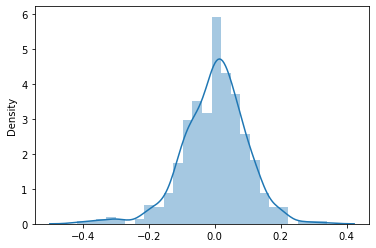

In [220]:
res = y_train - y_train_pred
sns.distplot(res)

## Prediction and Evaluation on the test set

In [221]:
df_test.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Rain,weathersit_Mist
184,185,04-07-2018,fall,0,Jul,1,Wed,0,Mist,29.793347,...,0,0,0,0,0,0,0,1,0,1
535,536,20-06-2019,summer,1,Jun,0,Fri,1,Clear,32.082500,...,0,0,0,0,0,0,0,0,0,0
299,300,27-10-2018,winter,0,Oct,0,Sat,1,Mist,19.270000,...,1,0,0,1,0,0,0,0,0,1
221,222,10-08-2018,fall,0,Aug,0,Fri,1,Clear,31.433347,...,0,0,0,0,0,0,0,0,0,0
152,153,02-06-2018,summer,0,Jun,0,Sat,1,Clear,29.315000,...,0,0,0,1,0,0,0,0,0,0


In [222]:
# Dropping the Categorical columns and not required columns
df_test = df_test.drop(['temp','casual','registered','dteday','instant','season','mnth','weekday','weathersit'] , axis=1)
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Rain,weathersit_Mist
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,22.85230,81.2917,13.250121,2659,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [223]:
num_vars = ['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Rain,weathersit_Mist
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [225]:
y_test = df_test.pop('cnt')
X_test = df_test

In [229]:
feature_drop = ['season_spring','season_summer','mnth_Aug','mnth_Dec','mnth_Feb','mnth_Jul','mnth_Jun','mnth_Mar','mnth_Nov','mnth_Oct','mnth_May','weekday_Sat','weekday_Sun','weekday_Thurs','weekday_Tues','weekday_Wed','hum']
X_test = X_test.drop(feature_drop , axis=1)

In [233]:
X_test = X_test.drop('holiday' , axis=1)
X_test

,yr,workingday,atemp,windspeed,season_winter,mnth_Jan,mnth_Sept,weekday_Mon,weathersit_Light_Rain,weathersit_Mist
184,0,0,0.769660,0.084219,0,0,0,0,0,1
535,1,1,0.842587,0.153728,0,0,0,0,0,0
299,0,1,0.496145,0.334206,1,0,0,0,0,1
221,0,1,0.795343,0.339570,0,0,0,0,0,0
152,0,1,0.741471,0.537414,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
702,1,1,0.511907,0.283397,1,0,0,0,0,0
127,0,0,0.577380,0.069510,0,0,0,0,0,0
640,1,1,0.682653,0.052115,1,0,0,0,0,1
72,0,1,0.332005,0.203418,0,0,0,0,0,0


In [234]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,workingday,atemp,windspeed,season_winter,mnth_Jan,mnth_Sept,weekday_Mon,weathersit_Light_Rain,weathersit_Mist
184,1.0,0,0,0.769660,0.084219,0,0,0,0,0,1
535,1.0,1,1,0.842587,0.153728,0,0,0,0,0,0
299,1.0,0,1,0.496145,0.334206,1,0,0,0,0,1
221,1.0,0,1,0.795343,0.339570,0,0,0,0,0,0
152,1.0,0,1,0.741471,0.537414,0,0,0,0,0,0


In [235]:
y_test_pred = lr_model_3.predict(X_test_sm)
y_test_pred

184    0.456410
535    0.854011
299    0.413297
221    0.567379
152    0.511198
         ...   
702    0.738623
127    0.428754
640    0.788323
72     0.335763
653    0.730422
Length: 220, dtype: float64

R2 score for test set

In [275]:
r2_score(y_true = y_test , y_pred = y_test_pred)

0.7712733211649752

Residual distribution

<AxesSubplot:ylabel='Density'>

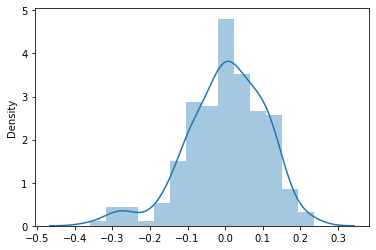

In [276]:
res_test = y_test - y_test_pred
sns.distplot(res_test)

Scatter plot to compare the y_test and y_test_pred

Text(0, 0.5, 'y_pred')

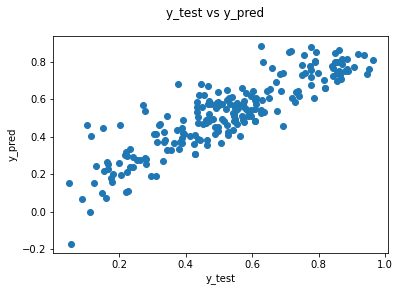

In [281]:
plt.scatter(y_test, y_test_pred)
plt.suptitle('y_test vs y_pred')              
plt.xlabel('y_test')                          
plt.ylabel('y_pred') 